# Demonstrates an example of the no cloning theorem

In [10]:
# no_cloning_theorem.ipynb

from IPython.display import display
from qis102_utils import as_latex
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_distribution,
)
from qiskit_aer import AerSimulator

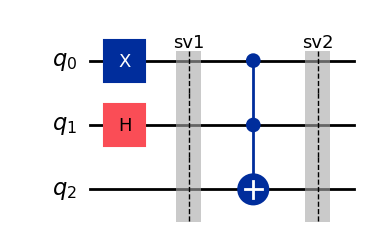

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
# Create state to try to clone

qc = QuantumCircuit(3)

qc.x(0)
qc.h(1)
qc.save_statevector(label="sv1")

# Try to use CCNOT to clone
qc.ccx(0, 1, 2)
qc.save_statevector(label="sv2")

display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled).result()

# Display results
sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;1}="))

Before the state is cloned, q0 is always on and q1 is on half of the time and off half of the time. This results in a 1 and a 3, normalized to make sure the norm is 1.

After the CCNOT gate, we should see that q0 is always on and q1 matches q2, being on half the time and off half the time. This would result in a 1 and a 7 half of the time, normalized to make sure the norm is 1.

With this logic, it appears as though the cloning worked. I am curious about where my logic went wrong, and look forward to discussing it.